# Task 1

- Are there more movies shorter than 100 min or longer than (or equal to) 100 minutes?  (show your answer numerically and graphically)
- Are there more action comedies or romantic comedies?
- Plot a histogram of the ratings for drama movies.
- Is the average rating of dramas higher than the average rating of non-dramas? (show your answer numerically and graphically)
- Plot the number of animated movies being produced every year for the period 1995-2005.
- Is there a clear boundary between short and feature movies (according to their length)?

In [20]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Define matplotlib plots and pandas output
font = {'size': 25}

matplotlib.rc('font', **font)
resize_value = 2.5
matplotlib.rcParams['figure.figsize'] = (resize_value*6.4, resize_value*4.8)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

Task 1: Shorter than 100 min: 2832, Longer than/equal to 100 min: 2092
Task 2: Action Comedies: 171, Romantic Comedies: 429


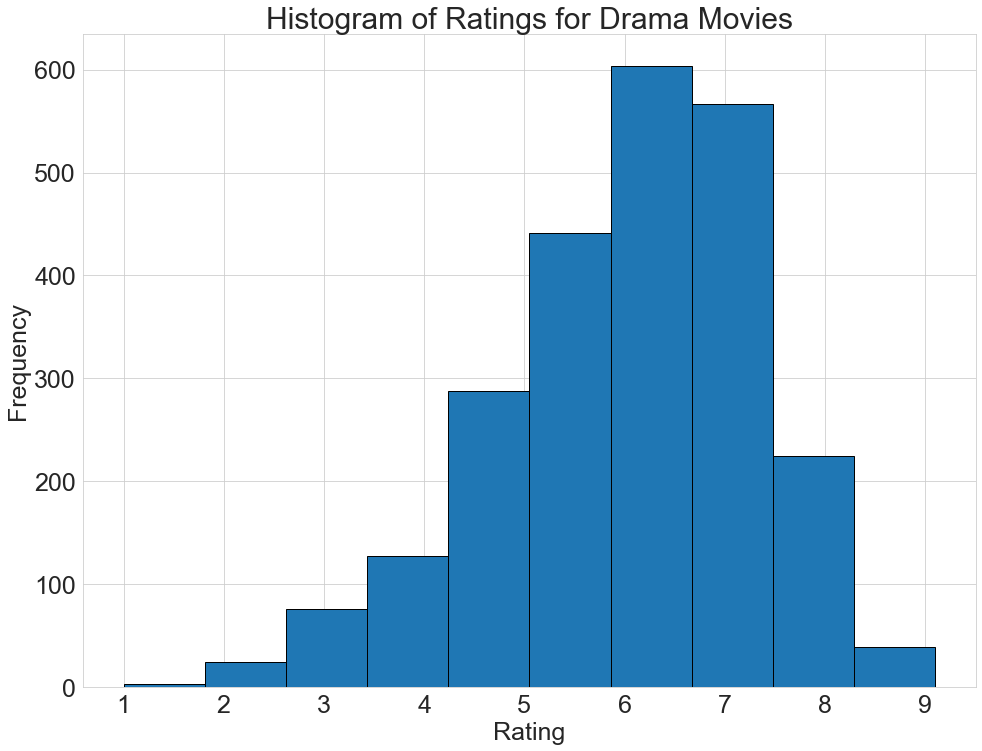

Task 4: Average Rating for Drama: 6.01541997492687, Average Rating for Non-Drama: 5.0527459502173055


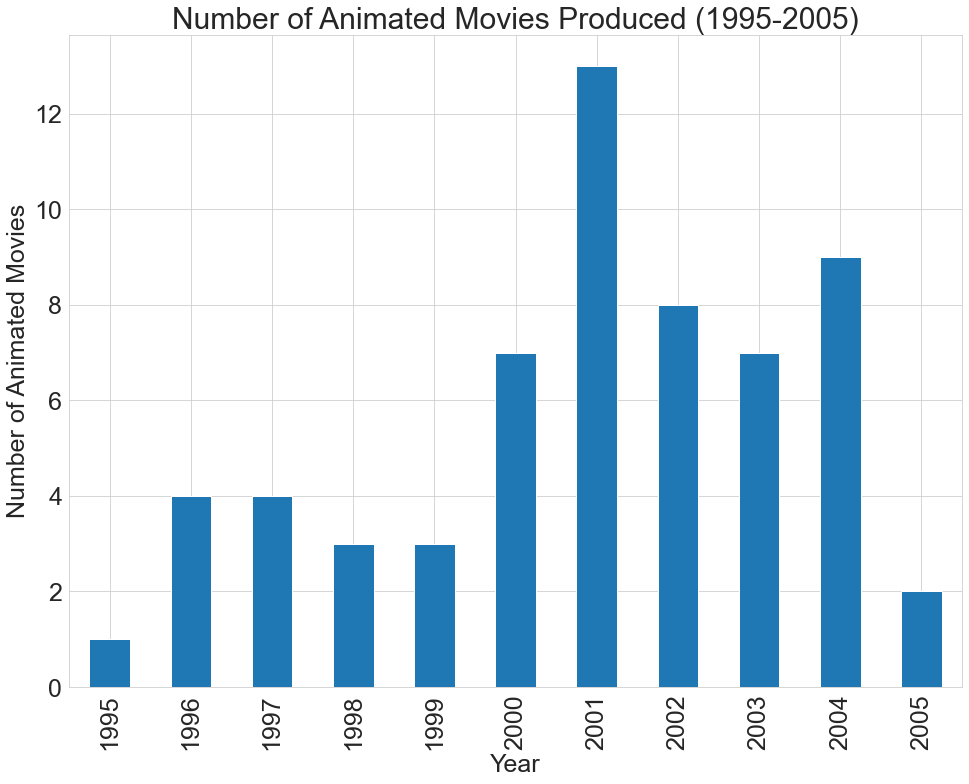

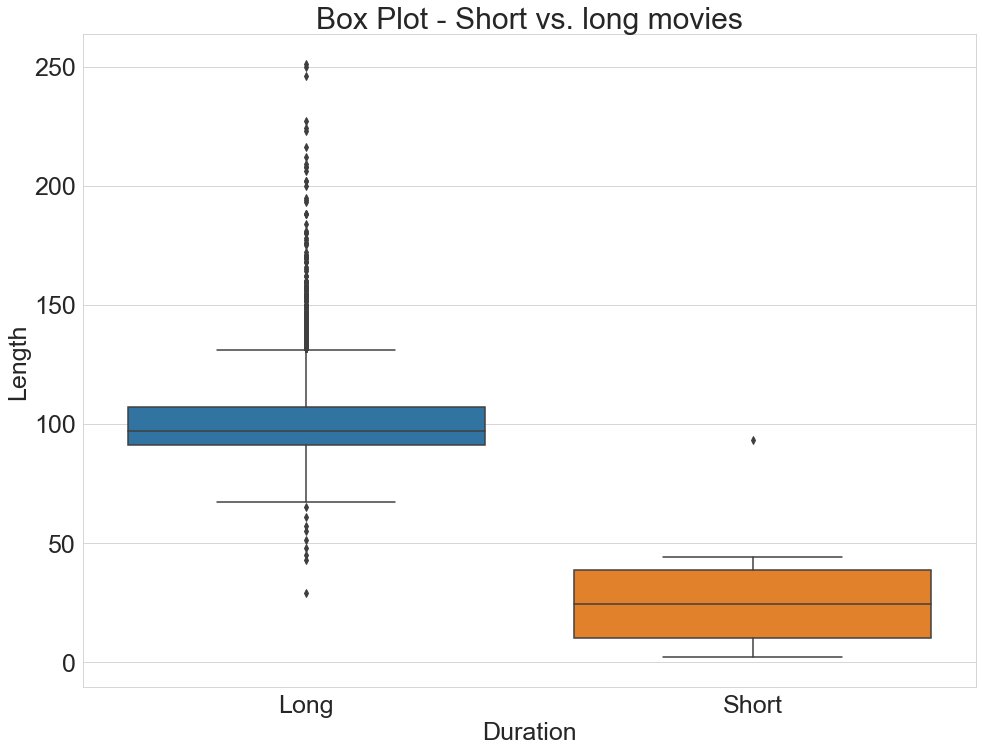

In [22]:
# Load the Movies dataset
movies = pd.read_csv("movies.txt", sep=",", header=0)

# Task 1: Count movies shorter than 100 min and longer/equal to 100 min
shorter_than_100 = len(movies[movies['length'] < 100])
longer_than_100 = len(movies[movies['length'] >= 100])
print(f"Task 1: Shorter than 100 min: {shorter_than_100}, Longer than/equal to 100 min: {longer_than_100}")

# Task 2: Count action comedies and romantic comedies
action_comedies = len(movies[(movies['Action'] == 1) & (movies['Comedy'] == 1)])
romantic_comedies = len(movies[(movies['Romance'] == 1) & (movies['Comedy'] == 1)])
print(f"Task 2: Action Comedies: {action_comedies}, Romantic Comedies: {romantic_comedies}")

# Task 3: Plot histogram of ratings for drama movies
drama_ratings = movies[movies['Drama'] == 1]['rating']
plt.hist(drama_ratings, bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings for Drama Movies')
plt.show()

# Task 4: Calculate average rating for drama and non-drama movies
average_drama_rating = movies[movies['Drama'] == 1]['rating'].mean()
average_non_drama_rating = movies[movies['Drama'] == 0]['rating'].mean()
print(f"Task 4: Average Rating for Drama: {average_drama_rating}, Average Rating for Non-Drama: {average_non_drama_rating}")

# Task 5: Plot number of animated movies produced each year from 1995 to 2005
animated_movies = movies[(movies['Animation'] == 1) & (movies['year'] >= 1995) & (movies['year'] <= 2005)]
animated_movie_counts = animated_movies.groupby('year').size()
animated_movie_counts.plot(kind='bar', xlabel='Year', ylabel='Number of Animated Movies', title='Number of Animated Movies Produced (1995-2005)')
plt.show()

# Task 6: Clear boundary or not between short and feature movies
sns.boxplot(data=movies, x='Short', y='length')
plt.xticks([False, True], ["Long", "Short"])
plt.title("Box Plot - Short vs. long movies")
plt.xlabel("Duration")
plt.ylabel("Length")
plt.show()

# Task 2

- Plot the proportion of players according to playing positions.
- Compare career rebounds (the "reb" attribute) with respect to playing position.
- Show the distribution of free throw percentages. The percentage is determined by dividing the number of shots made ("ftm") by the total number of shots attempted ("fta").
- Compare career field goal (fgm) made for the players active between 1990 and 2007, with respect to playing position.
- How does the average career length of retired players vary from year to year?

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Players dataset
players = pd.read_csv("players.txt", sep=",", header=0)

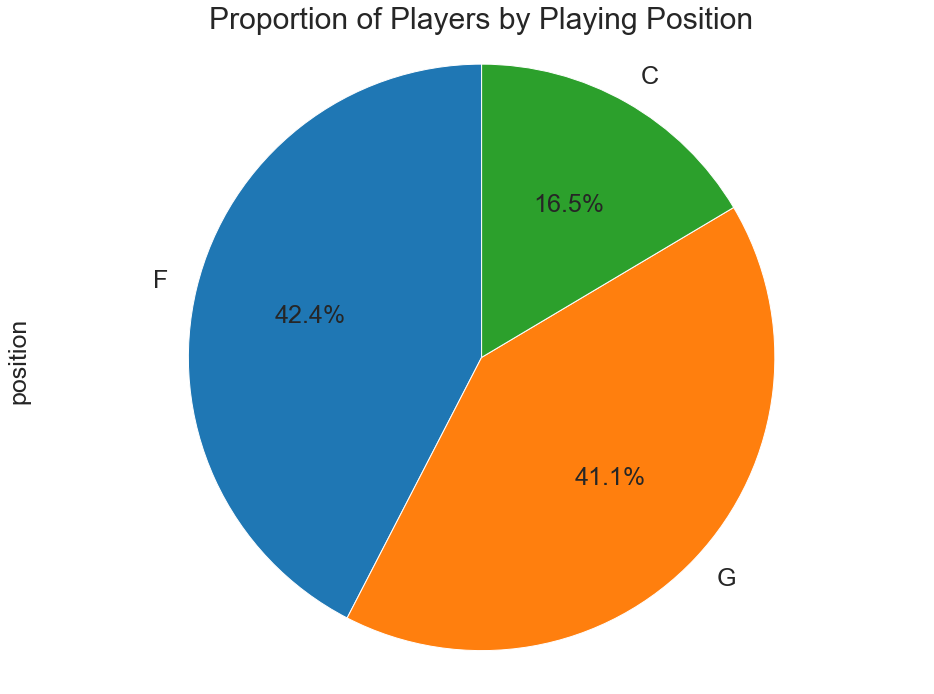


Task 1: Proportion of Players by Playing Position:
F    1340
G    1299
C     520
Name: position, dtype: int64


In [24]:
# Task 1: Plot proportion of players according to playing positions
position_counts = players['position'].value_counts()
position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Players by Playing Position')
plt.show()
print("\nTask 1: Proportion of Players by Playing Position:")
print(position_counts)

In [25]:
# Task 2: Compare career rebounds by playing position
position_rebounds = players.groupby('position')['reb'].mean().sort_values(ascending=False)
print("\nTask 2: Career Rebounds by Playing Position:")
print(position_rebounds)


Task 2: Career Rebounds by Playing Position:
position
C   1937.55
F   1308.64
G    665.11
Name: reb, dtype: float64


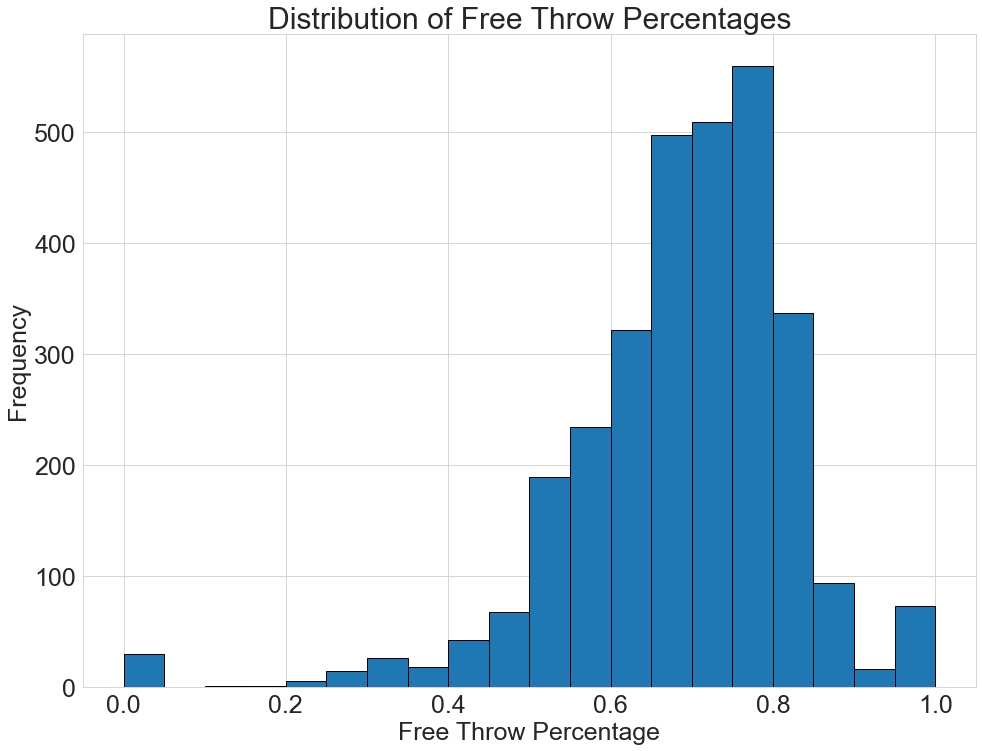

In [26]:
# Task 3: Show distribution of free throw percentages
players['ft_percentage'] = players['ftm'] / players['fta']
plt.hist(players['ft_percentage'], bins=20, edgecolor='black')
plt.xlabel('Free Throw Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Free Throw Percentages')
plt.show()


Task 4: Career fgm Made for Active Players (1990-2007) by Playing Position:
position
G   663.93
F   654.11
C   446.26
Name: fgm, dtype: float64


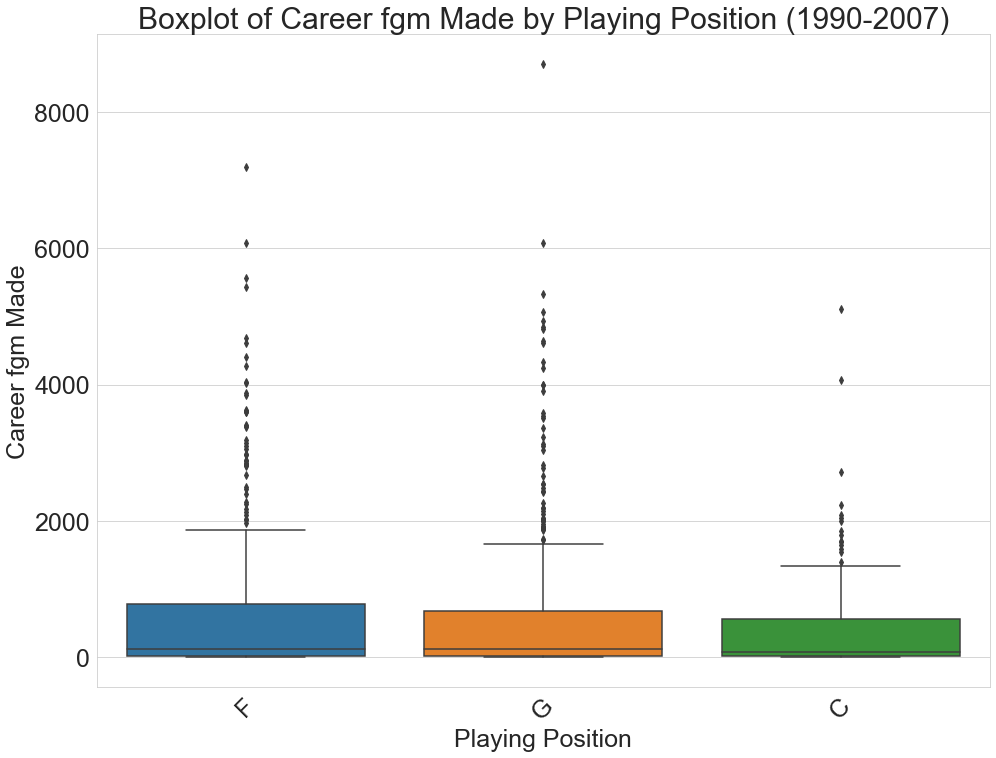

In [34]:
# Task 4: Compare career fgm for players active between 1990 and 2007 by playing position
active_players_1990_2007 = players[(players['firstseason'] >= 1990) & (players['lastseason'] <= 2007)]
position_fgm = active_players_1990_2007.groupby('position')['fgm'].mean().sort_values(ascending=False)
print("\nTask 4: Career fgm Made for Active Players (1990-2007) by Playing Position:")
print(position_fgm)

sns.boxplot(active_players_1990_2007, x='position', y='fgm')
plt.xlabel("Playing Position")
plt.ylabel("Career fgm Made")
plt.title("Boxplot of Career fgm Made by Playing Position (1990-2007)")
plt.xticks(rotation=45)
plt.show()

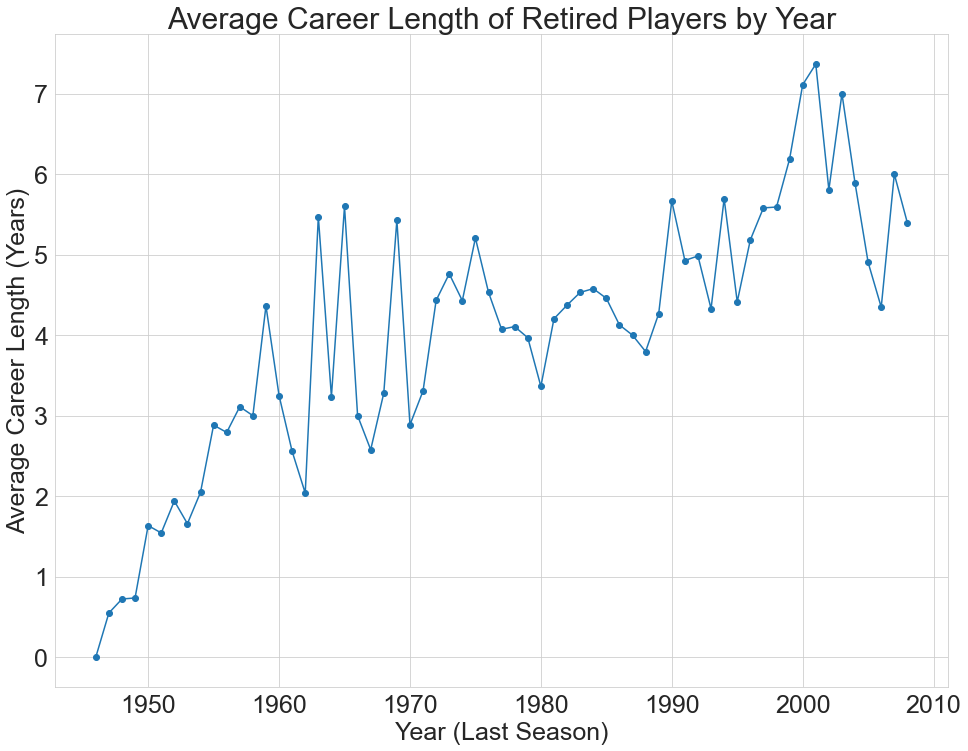


Task 5: Average Career Length of Retired Players by Year:
lastseason
1946   0.00
1947   0.55
1948   0.72
1949   0.74
1950   1.63
1951   1.54
1952   1.94
1953   1.66
1954   2.05
1955   2.88
1956   2.79
1957   3.11
1958   3.00
1959   4.36
1960   3.25
1961   2.56
1962   2.04
1963   5.47
1964   3.24
1965   5.60
1966   3.00
1967   2.58
1968   3.28
1969   5.43
1970   2.89
1971   3.31
1972   4.43
1973   4.76
1974   4.43
1975   5.21
1976   4.53
1977   4.07
1978   4.11
1979   3.97
1980   3.36
1981   4.20
1982   4.37
1983   4.53
1984   4.58
1985   4.46
1986   4.13
1987   4.00
1988   3.80
1989   4.27
1990   5.67
1991   4.93
1992   4.98
1993   4.33
1994   5.69
1995   4.41
1996   5.18
1997   5.58
1998   5.59
1999   6.19
2000   7.11
2001   7.37
2002   5.81
2003   7.00
2004   5.89
2005   4.90
2006   4.35
2007   6.00
2008   5.39
Name: career_length, dtype: float64


In [36]:
# Task 5: Calculate average career length of retired players by year
retired_players = players[players['lastseason'] != 2008].copy()
retired_players['career_length'] = retired_players['lastseason'] - retired_players['firstseason']
average_career_length_by_year = retired_players.groupby('lastseason')['career_length'].mean()

plt.plot(average_career_length_by_year.index, average_career_length_by_year.values, marker='o', linestyle='-')
plt.xlabel("Year (Last Season)")
plt.ylabel("Average Career Length (Years)")
plt.title("Average Career Length of Retired Players by Year")
plt.grid(True)
plt.show()

print("\nTask 5: Average Career Length of Retired Players by Year:")
print(average_career_length_by_year)